# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exploratory-Data-Analysis-(EDA)-Module" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA) Module</a></div><div class="lev2 toc-item"><a href="#Load--Data" data-toc-modified-id="Load--Data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load  Data</a></div><div class="lev2 toc-item"><a href="#Column-Description" data-toc-modified-id="Column-Description-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Description</a></div><div class="lev2 toc-item"><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Analysis</a></div><div class="lev2 toc-item"><a href="#Column-Drill-down" data-toc-modified-id="Column-Drill-down-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Column Drill-down</a></div>

# Exploratory Data Analysis (EDA) Module

In [1]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.disable(logging.ERROR)

In [3]:
import edatools.edatools as eda

## Load  Data

In [4]:
mpg = pd.read_csv("https://raw.githubusercontent.com/jykim/dbook/master/mpg.txt", sep="\t")

In [5]:
eb = eda.RawTable(mpg)

## Column Description

In [6]:
eb.head()

,manufacturer,model,trans,drv,displ,year,cyl,cty,hwy,fl,class
0,dodge,durango 4wd,auto(l4),4,3.9,1999,6,13,17,r,suv
1,ford,f150 pickup 4wd,manual(m5),4,4.6,1999,8,13,16,r,pickup
2,volkswagen,gti,auto(l4),f,2.0,1999,4,19,26,r,compact
3,nissan,altima,manual(m5),f,2.4,1999,4,21,29,r,compact
4,volkswagen,gti,auto(s6),f,2.0,2008,4,22,29,p,compact
5,volkswagen,gti,manual(m5),f,2.0,1999,4,21,29,r,compact
6,land rover,range rover,auto(s6),4,4.2,2008,8,12,18,r,suv
7,toyota,camry,auto(l5),f,2.4,2008,4,21,31,r,midsize
8,ford,mustang,auto(l5),r,4.0,2008,6,16,24,r,subcompact
9,volkswagen,gti,manual(m6),f,2.0,2008,4,21,29,p,compact


In [7]:
eb.colinfo()

,DataType,ValueCount,NullCount,0,1,2
manufacturer,object,15,0,dodge,ford,volkswagen
model,object,38,0,durango 4wd,f150 pickup 4wd,gti
trans,object,10,0,auto(l4),manual(m5),auto(l4)
drv,object,3,0,4,4,f
displ,float64,35,0,3.9,4.6,2
year,int64,2,0,1999,1999,1999
cyl,int64,4,0,6,8,4
cty,int64,21,0,13,13,19
hwy,int64,27,0,17,16,26
fl,object,5,0,r,r,r


In [8]:
eb.desc(outputcol=4, max_bins=10, figsize=(4,4))

In [9]:
eb.desc_detail(['drv', 'displ'], proportiontocut=0.2);

,drv
count,234
unique,3
top,f
freq,106
,drv
f,106
4,103
r,25
,displ
count,234.000000


## Correlation Analysis

In [10]:
eb.corr()

,displ,year,cyl,cty,hwy
displ,1,0.152,0.941,-0.881,-0.827
year,0.152,1,0.119,-0.007,0.04
cyl,0.941,0.119,1,-0.867,-0.793
cty,-0.881,-0.007,-0.867,1,0.954
hwy,-0.827,0.04,-0.793,0.954,1


,year,cyl,cty,hwy
cty,-0.006856,-0.866962,1.0,0.95421


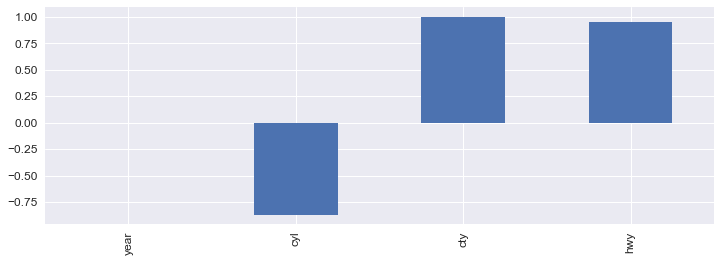

In [11]:
eb.corr_with('cty')

In [12]:
eb.pairplot(["displ","year", "trans"], ["cyl", "cty", 'class'], figsize=(5,5))

In [17]:
eb.pairplot_scatter_with_hover("displ", ["hwy", "cty"], color='class', hover_cols=['class', 'model', 'year'], 
                               alpha=0.5, size=10, figsize=(400,400))

,


## Column Drill-down

You can also divide the table into sub-groups and run the same analysis as below

In [14]:
for e in eb.groupby("class"):
    e.corr()
    e.desc(['displ','cty','hwy'])

,displ,year,cyl,cty,hwy
displ,1,0.121,0.817,-0.631,-0.634
year,0.121,1,-0.127,0.224,0.226
cyl,0.817,-0.127,1,-0.683,-0.598
cty,-0.631,0.224,-0.683,1,0.887
hwy,-0.634,0.226,-0.598,0.887,1


,displ,year,cyl,cty,hwy
displ,1,0.239,0.872,-0.599,-0.541
year,0.239,1,-0.017,0.304,0.325
cyl,0.872,-0.017,1,-0.731,-0.761
cty,-0.599,0.304,-0.731,1,0.757
hwy,-0.541,0.325,-0.761,0.757,1


,displ,year,cyl,cty,hwy
displ,1,0.087,0.876,-0.792,-0.655
year,0.087,1,0.213,0.023,0.147
cyl,0.876,0.213,1,-0.814,-0.7
cty,-0.792,0.023,-0.814,1,0.916
hwy,-0.655,0.147,-0.7,0.916,1


,displ,year,cyl,cty,hwy
displ,1,0.298,0.879,-0.921,-0.894
year,0.298,1,0.368,-0.248,-0.172
cyl,0.879,0.368,1,-0.832,-0.792
cty,-0.921,-0.248,-0.832,1,0.96
hwy,-0.894,-0.172,-0.792,0.96,1


,displ,year,cyl,cty,hwy
displ,1,0.13,0.863,-0.686,-0.534
year,0.13,1,0.163,-0.004,0.297
cyl,0.863,0.163,1,-0.789,-0.614
cty,-0.686,-0.004,-0.789,1,0.792
hwy,-0.534,0.297,-0.614,0.792,1


In [15]:
eb.pivot_ui()